<a href="https://colab.research.google.com/github/aman65823/amanproject-demo/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
data=pd.read_csv('titanic.csv')

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
cols_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked']

In [ ]:
clean_data = data.drop(cols_to_drop, axis=1)

In [ ]:
clean_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
clean_data['Sex'] = le.fit_transform(clean_data['Sex'])

In [ ]:
clean_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [ ]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [ ]:
clean_data = clean_data.fillna(clean_data['Age'].mean())

In [ ]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [ ]:
input_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
output_cols = ['Survived']
x = clean_data[input_cols]
y = clean_data[output_cols]
x.shape, y.shape

((891, 6), (891, 1))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
sk_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
...     x, y, test_size=0.33, random_state=42)

In [ ]:
sk_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
sk_tree.score(x_test, y_test)

0.8067796610169492

In [ ]:
sk_tree.predict(x_test[:10])

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1])

In [ ]:
y_test[:10]

,Survived
709,1
439,0
840,0
720,1
39,1
290,1
300,1
333,0
208,1
136,1


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
data = RandomForestClassifier()

In [ ]:
data.fit(x_train, y_train)

<ipython-input-46-4c8411cfbf9d>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  data.fit(x_train, y_train)


RandomForestClassifier()

In [ ]:
y_pred=data.predict(x_test)

In [ ]:
sk_tree.score(x_test, y_pred)



0.8542372881355932

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import seaborn as sns

In [ ]:
class_name=['input_cols', 'output_cols']

In [ ]:
rai=confusion_matrix(y_test, y_pred)

In [ ]:
plt.figure(figsize=(3,3))

<Figure size 300x300 with 0 Axes>

<Figure size 300x300 with 0 Axes>

<Axes: >

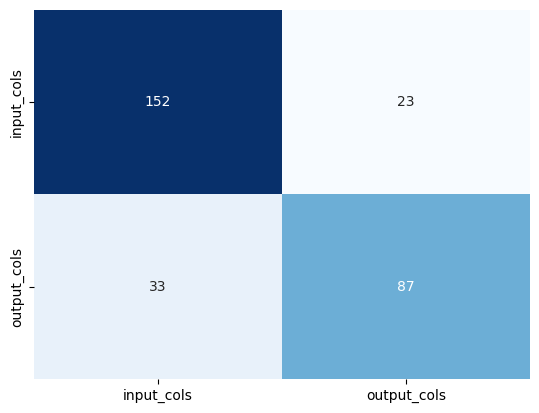

In [ ]:
sns.heatmap(rai,annot=True,fmt='d',cmap='Blues',cbar=False,xticklabels=class_name,yticklabels=class_name)


In [ ]:
plt.figure(figsize=(20,10))

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [ ]:
from sklearn import tree

In [ ]:
class_name=['input_cols', 'output_cols']

[Text(0.4132223113964687, 0.9722222222222222, 'Pclass <= 2.5\ngini = 0.453\nsamples = 374\nvalue = [389, 207]\nclass = input_cols'),
 Text(0.09670947030497593, 0.9166666666666666, 'Sex <= 0.5\ngini = 0.5\nsamples = 162\nvalue = [128, 128]\nclass = input_cols'),
 Text(0.038523274478330656, 0.8611111111111112, 'Age <= 26.5\ngini = 0.039\nsamples = 67\nvalue = [2, 99]\nclass = output_cols'),
 Text(0.025682182985553772, 0.8055555555555556, 'SibSp <= 0.5\ngini = 0.133\nsamples = 21\nvalue = [2, 26]\nclass = output_cols'),
 Text(0.012841091492776886, 0.75, 'gini = 0.0\nsamples = 11\nvalue = [0, 16]\nclass = output_cols'),
 Text(0.038523274478330656, 0.75, 'Age <= 24.5\ngini = 0.278\nsamples = 10\nvalue = [2, 10]\nclass = output_cols'),
 Text(0.025682182985553772, 0.6944444444444444, 'gini = 0.0\nsamples = 9\nvalue = [0, 10]\nclass = output_cols'),
 Text(0.051364365971107544, 0.6944444444444444, 'gini = 0.0\nsamples = 1\nvalue = [2, 0]\nclass = input_cols'),
 Text(0.051364365971107544, 0.8055

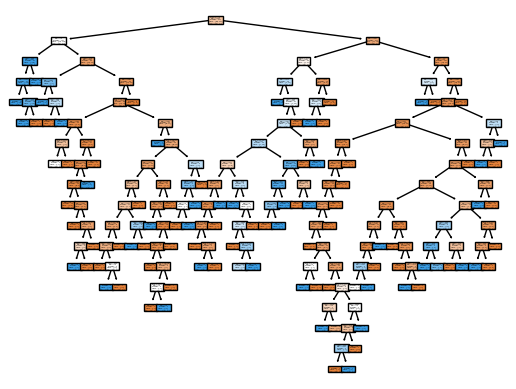

In [ ]:
tree.plot_tree(data.estimators_[67],feature_names=x.columns,class_names=class_name,filled=True)